In [58]:
import gensim
import nltk
import multiprocessing
from gensim.models import KeyedVectors
from gensim.models import Word2Vec
import pandas as pd
import numpy as np

In [6]:
import pandas as pd
import random
import warnings
warnings.filterwarnings("ignore")

In [7]:
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [96]:
df = pd.read_csv('clean_tweets_update.csv', usecols=['clean_keyword', 'clean_location', 'clean_tweets', 'tweets', 'pos_lems'])

In [97]:
target_df = pd.read_csv('train.csv', usecols=['target'])
target = list(target_df.target)

In [98]:
print(len(target))

7613


In [99]:
train_df, test_df = df.iloc[:len(target_df), :], df.iloc[len(target_df):, :] 
train_df['target'] = target
train_df.drop_duplicates(subset=['pos_lems'], keep='last', inplace=True)

In [774]:
train_length = len(train_df)
print(train_length)

6851


In [775]:
test_length = len(test_df)
print(test_length)

3263


In [786]:
texts = [train_df.tweets, test_df.tweets]
tweets = pd.concat(texts)
len(tweets)

10114

In [103]:
def kw_loc_column_fix(df):
    df['clean_keyword'] = df.clean_keyword.astype(str)
    df['clean_keyword'] = df.clean_keyword.str.lower()
    df['clean_keyword'] = df.clean_keyword.str.replace(r'\bnan\b', r'')
    df['clean_keyword'] = df.clean_keyword.str.replace(r' ', r'_')
    df['clean_keyword'] = df.clean_keyword.str.strip()
    df['clean_location'] = df.clean_location.astype(str)
    df['clean_location'] = df.clean_location.str.lower()
    df['clean_location'] = df.clean_location.str.strip()
    df['clean_location'] = df.clean_location.str.replace(r'\bnan\b', r'')
    df['clean_location'] = df.clean_location.str.replace(r' ', r'_')
    return df

In [104]:
df = kw_loc_column_fix(df)

In [105]:
train_df = kw_loc_column_fix(train_df)
test_df = kw_loc_column_fix(test_df)

In [106]:
keyword = pd.get_dummies(train_df.clean_keyword, prefix='keyword')
location = pd.get_dummies(train_df.clean_location, prefix='location')
train_df_secondary = pd.concat([keyword, location], axis=1)

keyword_test = pd.get_dummies(test_df.clean_keyword, prefix='keyword')
location_test = pd.get_dummies(test_df.clean_location, prefix='location')
test_df_secondary = pd.concat([keyword_test, location_test], axis=1)

In [171]:
def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            if len(word)>1:
                tokens.append(word.lower())
    return tokens

In [789]:
tweet_tokens = tweets.apply(tokenize_text)

In [ ]:
from collections import Counter
from statistics import mean

In [788]:
tweets

0        our deed reason this earthquake may allah forg...
1                    forest fire near la ronge sask canada
2        all resident ask shelter place notify by offic...
3        people receive wildfire evacuation order calif...
4        just get send this photo from ruby alaska smok...
                               ...                        
10871    earthquake safety los angeles safety fastener ...
10872    storm rhode island bad than last hurricane my ...
10873                        green line derailment chicago
10874              meg issue hazardous weather outlook hwo
10875    cityof calgary have activate it municipal emer...
Name: tweets, Length: 10114, dtype: object

In [795]:
word_dict = Counter(tweet_tokens.sum())
# count number of words in corpus
num_words = sum(word_dict[w] for w in word_dict)
print(f'There are {num_words} words in the training dataset')

# count number of unique words in corpus
word_count_sorted = [(value, key) for key, value in word_dict.items()]
word_count_sorted.sort()
vocab_size = len(word_count_sorted)
max_len = max([len(x) for x in tweet_tokens])
print(f'There are {vocab_size} unique words in the training dataset')
print("max len of tweets",max_len)
print("min len of tweets",min([len(x) for x in tweet_tokens]))
print("mean len of tweets", mean([len(x) for x in tweet_tokens]))

There are 116313 words in the training dataset
There are 13307 unique words in the training dataset
max len of tweets 28
min len of tweets 1
mean len of tweets 11.500197745699031


In [791]:
from tensorflow.keras.preprocessing.text import one_hot

In [796]:
maxlen = 32
tokenizer = text.Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(tweet_tokens)
tokenized_train = tokenizer.texts_to_sequences(tweet_tokens)
x_train = sequence.pad_sequences(tokenized_train, maxlen=max_len)
x_train

array([[   0,    0,    0, ..., 1749, 1750,   30],
       [   0,    0,    0, ..., 6269, 6270,  997],
       [   0,    0,    0, ...,  487,  386,  609],
       ...,
       [   0,    0,    0, ...,  395,  533,  775],
       [   0,    0,    0, ...,  271, 1516, 1612],
       [   0,    0,    0, ...,   55,  116, 2550]])

In [797]:
tokenized_train

[[103, 4408, 536, 12, 288, 179, 1749, 1750, 30],
 [184, 17, 229, 1119, 6269, 6270, 997],
 [30,
  1270,
  421,
  1621,
  487,
  6271,
  13,
  459,
  27,
  298,
  299,
  52,
  1621,
  487,
  386,
  609],
 [44, 1622, 201, 299, 386, 84],
 [20, 14, 349, 12, 220, 15, 3527, 1217, 249, 15, 201, 2302, 72, 225],
 [1069, 17, 261, 84, 998, 325, 686, 1218, 411, 869, 367, 17, 6272, 201],
 [65, 75, 802, 235, 244, 838, 65, 205, 6273, 899, 959, 268],
 [3, 254, 1070, 28, 63, 17, 1751],
 [48, 33, 55, 299, 217, 40, 59, 774, 205],
 [1899, 9, 435, 66, 103, 268],
 [472, 44, 161, 15, 274, 240, 21, 436],
 [803,
  361,
  2110,
  14,
  65,
  3528,
  331,
  292,
  85,
  361,
  2110,
  38,
  275,
  147,
  8,
  38,
  275,
  147,
  8,
  93,
  65],
 [235, 65, 1219, 2110, 548, 2110, 52, 68, 5, 422, 2577],
 [65, 4409, 870, 24, 900, 4409],
 [197, 225, 368, 3, 2578, 105, 64, 119],
 [38, 22, 101],
 [70, 1520],
 [232, 1623],
 [7, 105, 21, 592],
 [38, 1220],
 [12, 2986],
 [901, 423],
 [70, 3529],
 [38, 2111, 68],
 [4410],
 

In [792]:
one_hot_tweets = [one_hot(token, vocab_size) for token in tweet_tokens]

AttributeError: 'list' object has no attribute 'lower'

In [220]:
word_dict = Counter(df.texts.sum())
# count number of words in corpus
num_words = sum(word_dict[w] for w in word_dict)
print(f'There are {num_words} words in the training dataset')

# count number of unique words in corpus
word_count_sorted = [(value, key) for key, value in word_dict.items()]
word_count_sorted.sort()
vocab_size = len(word_count_sorted)
print(f'There are {vocab_size} unique words in the training dataset')
print("max len of tweets",max([len(x) for x in df.texts]))
print("min len of tweets",min([len(x) for x in df.texts]))
print("mean len of tweets", mean([len(x) for x in df.texts]))

There are 124880 words in the training dataset
There are 13307 unique words in the training dataset
max len of tweets 28
min len of tweets 1
mean len of tweets 11.48216255976462


## wordcloud

In [107]:
from wordcloud import WordCloud
def plot_wordcloud (df): 
    pos_ = df[df['target']==1]['tweets']
    neg_ = df[df['target']==0]['tweets']
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[26, 8])
    wordcloud1 = WordCloud( background_color='black',
                          width=600,
                          height=400).generate(" ".join(pos_)) 

    ax1.imshow(wordcloud1)
    ax1.axis('off')
    ax1.set_title('Disaster Tweets',fontsize=40);
    # Non disaster
    wordcloud2 = WordCloud( background_color='white',
                          width=600,
                          height=400).generate(" ".join(neg_)) 

    ax2.imshow(wordcloud2)
    ax2.axis('off')
    ax2.set_title('Not Disaster Tweets',fontsize=40);

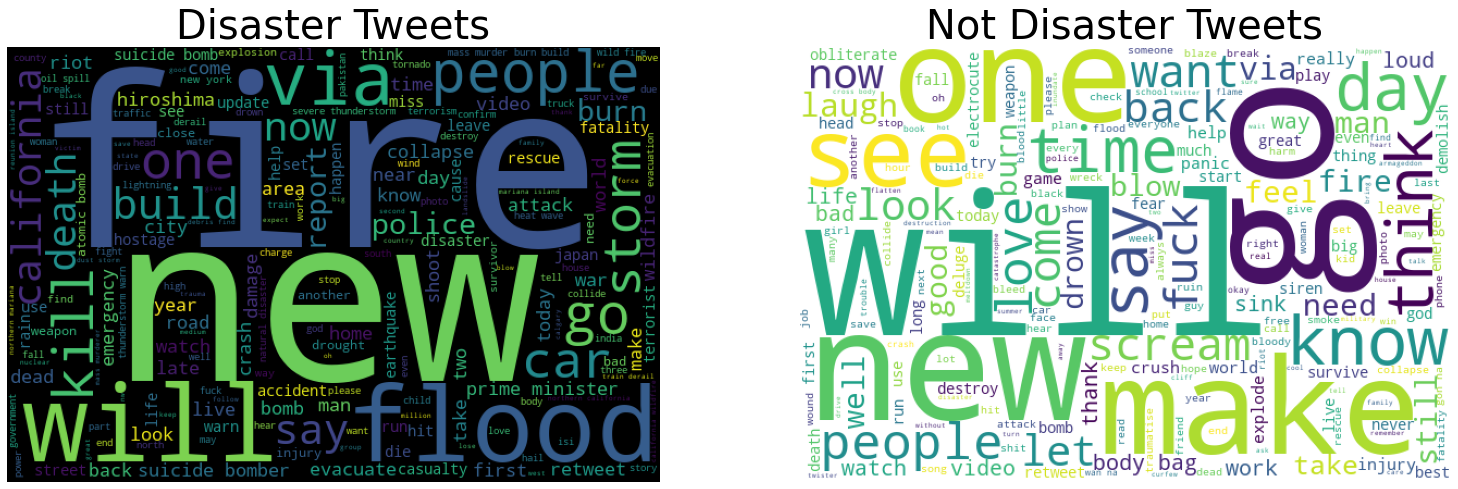

In [108]:
plot_wordcloud(train_df)

## extract bigrams

In [109]:
from gensim.models.phrases import Phrases, ENGLISH_CONNECTOR_WORDS
from nltk.corpus import stopwords

In [110]:
len(tweets)

10114

In [169]:
def get_documents(text):
    docs = [row.split() for row in text]
    return docs

doc = get_documents(tweets)

def sentence_to_bi_grams(sentence):
    return ' '.join(phrases[sentence])

phrases = Phrases(doc, min_count=5, threshold=6, connector_words=ENGLISH_CONNECTOR_WORDS)

frozen_phrases = phrases.freeze()

bigrams = []
for row in doc: 
    parsed_sentence = sentence_to_bi_grams(row)
    bigrams.append(parsed_sentence)


In [170]:
train_df['bigrams'], test_df['bigrams'] = bigrams[:len(train_df)], bigrams[len(train_df):] 

## prep text for vectorization

In [114]:
import re

import nltk
from nltk.corpus import stopwords
stopword_list = stopwords.words('english')
def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            if word not in stopword_list and len(word) > 1:
                tokens.append(word.lower())
    return tokens

train_tweets = train_df.stems.astype(str).apply(tokenize_text)
test_tweets = test_df.stems.apply(tokenize_text)

In [172]:
train_df['texts'] = train_df.tweets.apply(tokenize_text)
test_df['texts'] = test_df.tweets.apply(tokenize_text)
train_df['bg'] = train_df.bigrams.apply(tokenize_text)
test_df['bg'] = test_df.bigrams.apply(tokenize_text)
#bigram_tokes = new_df.bigrams.apply(tokenize_text)

In [637]:
train_df['lem'] = train_df.pos_lems.apply(tokenize_text)
test_df['lem'] = test_df.pos_lems.apply(tokenize_text)

In [173]:
X_train, X_test, y_train, y_test = train_test_split(train_df.bg, train_df.target, test_size=0.2, random_state=42)

In [174]:
word_dict = Counter(X_train.sum())
# count number of words in corpus
num_words = sum(word_dict[w] for w in word_dict)
print(f'There are {num_words} words in the training dataset')

# count number of unique words in corpus
word_count_sorted = [(value, key) for key, value in word_dict.items()]
word_count_sorted.sort()
vocab_size = len(word_count_sorted)
print(f'There are {vocab_size} unique words in the training dataset')
print("max len of training tweets",max([len(x) for x in X_train]))
print("max len of test tweets",max([len(x) for x in X_test]))
print("min len of training tweets",min([len(x) for x in X_train]))
print("min len of test tweets",min([len(x) for x in X_test]))
print("mean len of training tweets", mean([len(x) for x in X_train]))
print("mean len of test tweets",mean([len(x) for x in X_test]))

There are 72889 words in the training dataset
There are 12799 unique words in the training dataset
max len of training tweets 30
max len of test tweets 27
min len of training tweets 1
min len of test tweets 1
mean len of training tweets 13.300912408759125
mean len of test tweets 13.221006564551422


In [175]:
def get_embedding(word, model, vector_size):
    if word in model.wv:
        return model[x]
    else: 
        return np.zeros(vector_size)

def get_average_vector(model, list_of_tweets):    
    vec_dicts = {}
    for tweet in list_of_tweets:
        average_vector = (np.mean(np.array([get_embedding(tweet, model)]), axis=0))
        v_dict = {tweet : (average_vector)}
        vec_dicts.update(v_dict)
        return vec_dicts

In [176]:
from sklearn.decomposition import IncrementalPCA    # inital reduction
from sklearn.manifold import TSNE                   # final reduction   
import plotly

In [177]:
def reduce_dimensions(model):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    # extract the words & their vectors, as numpy arrays
    vectors = np.asarray(model.wv.vectors)
    labels = np.asarray(model.wv.index_to_key)  # fixed-width numpy strings

    # reduce using t-SNE
    tsne = TSNE(n_components=num_dimensions, random_state=42)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels


def plot_with_plotly(x_vals, y_vals, labels, plot_in_notebook=True):
    from plotly.offline import init_notebook_mode, iplot, plot
    import plotly.graph_objs as go

    trace = go.Scatter(x=x_vals, y=y_vals, mode='text', text=labels)
    data = [trace]

    if plot_in_notebook:
        init_notebook_mode(connected=True)
        iplot(data, filename='word-embedding-plot')
    else:
        plot(data, filename='word-embedding-plot.html')


def plot_with_matplotlib(x_vals, y_vals, labels):
    import matplotlib.pyplot as plt
    import random

    random.seed(0)

    plt.figure(figsize=(12, 12))
    plt.scatter(x_vals, y_vals)

    indices = list(range(len(labels)))
    selected_indices = random.sample(indices, 25)
    for i in selected_indices:
        plt.annotate(labels[i], (x_vals[i], y_vals[i]))

try:
    get_ipython()
except Exception:
    plot_function = plot_with_matplotlib
else:
    plot_function = plot_with_plotly



## uninitialized skipgram

In [178]:
cores = multiprocessing.cpu_count()

In [179]:
# uninitializeed model
model_ui_sg = Word2Vec(
        vector_size=50,
        sg=1,
        negative=10,
        sample=1e-3,
        min_count=2,
        epochs=5,
        window=3,
        workers=cores)
vocab = model_ui_sg.build_vocab(X_train)

model_ui_sg.train(X_train, total_examples=model_ui_sg.corpus_count, total_words=num_words, compute_loss=True, epochs=5)

(266517, 364445)

In [180]:
model_ui_sg.wv.most_similar(positive="wildfire")

[('near', 0.9967278838157654),
 ('county', 0.9965260028839111),
 ('northern_california', 0.9964895248413086),
 ('full_read', 0.9961672425270081),
 ('cross_body', 0.996120810508728),
 ('costlier_bigger', 0.9960567355155945),
 ('india', 0.9958125352859497),
 ('street', 0.9955621361732483),
 ('northern_mariana', 0.9955027103424072),
 ('prime_minister', 0.9954419732093811)]

In [181]:
model_ui_sg.wv.most_similar(positive="earthquake")

[('reported', 0.9970067739486694),
 ('attack', 0.9968788623809814),
 ('near', 0.9967849254608154),
 ('latest', 0.9966119527816772),
 ('live_to_recount', 0.9965243935585022),
 ('kills', 0.9964951872825623),
 ('county', 0.9964852333068848),
 ('usgs', 0.9964354634284973),
 ('northern_mariana', 0.9963988661766052),
 ('india', 0.9963617920875549)]

In [182]:
model_ui_sg.get_latest_training_loss()

476586.3125

In [183]:
x_vals, y_vals, labels = reduce_dimensions(model_ui_sg)
plot_function(x_vals, y_vals, labels)

## self initialized skipgram

In [184]:
# uninitializeed model
model_si_sg = Word2Vec(
        sentences=X_train,
        vector_size=100,
        sg=0,
        min_count=2,
        epochs=5,
        window=3,
        workers=cores)
vocab = model_si_sg.build_vocab(X_train)

model_si_sg.train(X_train, total_examples=model_ui_sg.corpus_count, total_words=num_words, compute_loss=True, epochs=5)

(266714, 364445)

In [185]:
model_si_sg.wv.most_similar(positive="earthquake")

[('will', 0.9997627139091492),
 ('after', 0.9997080564498901),
 ('her', 0.9997008442878723),
 ('new', 0.9996928572654724),
 ('or', 0.9996892809867859),
 ('into', 0.9996891021728516),
 ('storm', 0.9996770024299622),
 ('__url_here', 0.9996762275695801),
 ('some', 0.9996761083602905),
 ('people', 0.9996758103370667)]

In [186]:
model_si_sg.wv.most_similar(positive="fire")

[('on', 0.9997832775115967),
 ('turkish', 0.9997825026512146),
 ('armageddon', 0.9997790455818176),
 ('car', 0.999775230884552),
 ('good', 0.9997722506523132),
 ('at', 0.9997618198394775),
 ('new', 0.9997611045837402),
 ('us', 0.9997599720954895),
 ('inc', 0.9997584819793701),
 ('sarcasm', 0.9997537136077881)]

In [187]:
model_si_sg.get_latest_training_loss()

113208.734375

In [188]:
x_vals, y_vals, labels = reduce_dimensions(model_si_sg)
plot_function(x_vals, y_vals, labels)

# cbow

In [189]:
# uninitializeed model
model_ui_bow = Word2Vec(
        vector_size=100, 
        min_count=2,
        negative=6,
        sample=1e-3,
        window=4, 
        workers=cores)

vocab = model_ui_bow.build_vocab(X_train)

model_ui_bow.train(X_train, total_examples=model_ui_bow.corpus_count, epochs=10)

(533434, 728890)

In [190]:
model_ui_bow.wv.most_similar(positive="wildfire")

[('rescue', 0.9996278882026672),
 ('india', 0.999608039855957),
 ('flood', 0.9996048212051392),
 ('california', 0.9995899796485901),
 ('county', 0.9995899796485901),
 ('two', 0.9995781183242798),
 ('times', 0.9995754361152649),
 ('says', 0.9995622038841248),
 ('bag', 0.9995598196983337),
 ('retweet', 0.9995552897453308)]

In [191]:
model_ui_bow.wv.most_similar(positive="earthquake")

[('county', 0.9996484518051147),
 ('nuclear', 0.9996441006660461),
 ('street', 0.9996320605278015),
 ('emergency', 0.9996270537376404),
 ('accident', 0.9996044039726257),
 ('near', 0.9996001124382019),
 ('times', 0.9995917677879333),
 ('during', 0.9995880126953125),
 ('attack', 0.9995825886726379),
 ('killed', 0.9995817542076111)]

In [192]:
model_ui_bow.get_latest_training_loss()

0.0

In [193]:
x_vals, y_vals, labels = reduce_dimensions(model_ui_bow)
plot_function(x_vals, y_vals, labels)

In [194]:
from gensim.models import KeyedVectors

# Store just the words + their trained embeddings.
word_vectors = model_ui_bow.wv
word_vectors.save("word2vec.wordvectors")

# Load back with memory-mapping = read-only, shared across processes.
wv = KeyedVectors.load("word2vec.wordvectors", mmap='r')

vector = wv['fire']  # Get numpy vector of a word
vector

array([-0.36541808,  0.37477306,  0.00433727,  0.17727534,  0.09249203,
       -1.2536288 ,  0.45263922,  1.1255949 , -0.5121107 , -0.44622222,
       -0.08460937, -0.9432749 ,  0.13483034,  0.44815174,  0.21867436,
       -0.4112403 ,  0.40844968, -0.5738068 , -0.00896528, -1.1451219 ,
        0.3879669 ,  0.1448771 ,  0.5924484 , -0.01918105, -0.13775021,
       -0.10194375, -0.48491815, -0.28957403, -0.6071805 ,  0.20762521,
        0.9326647 , -0.26404458,  0.15256736, -0.68934023, -0.18018879,
        0.5857238 ,  0.21051632, -0.3510654 , -0.47572467, -0.82030815,
        0.28084177, -0.74097776, -0.46499825,  0.00646586,  0.39973348,
       -0.06599838, -0.48152626, -0.07819653,  0.29168487,  0.31696233,
        0.26660243, -0.41995248, -0.10863881, -0.10117969, -0.2928769 ,
        0.16506587,  0.372679  , -0.11016709, -0.59967434,  0.10439267,
        0.09310298,  0.09749138, -0.00188314,  0.05444554, -0.36991572,
        0.5501875 ,  0.11978539,  0.38238326, -0.9324898 ,  0.68

In [195]:
# self initialized model
model_si_bow = Word2Vec(
        X_train,
        vector_size=100, 
        cbow_mean=1,
        min_count=2,
        window=2, 
        workers=cores)
vocab = model_si_bow.build_vocab(X_train)

model_si_bow.train(X_train,  total_examples=len(X_train), total_words=num_words, epochs=10)

(533355, 728890)

In [196]:
model_si_bow.wv.most_similar(positive="wildfire")

[('street', 0.9994968771934509),
 ('fires', 0.9994850754737854),
 ('times', 0.999439537525177),
 ('south', 0.9994298815727234),
 ('retweet', 0.9993693828582764),
 ('homes', 0.9993669986724854),
 ('flooding', 0.9993610978126526),
 ('red', 0.9993499517440796),
 ('military', 0.9993320107460022),
 ('deaths', 0.9993197917938232)]

In [197]:
model_si_bow.wv.most_similar(positive="earthquake")

[('hazard', 0.9995259642601013),
 ('county', 0.9995066523551941),
 ('black', 0.9994542598724365),
 ('rescued', 0.9994412064552307),
 ('wind', 0.9994202256202698),
 ('weapons', 0.9994109272956848),
 ('action', 0.9994094967842102),
 ('group', 0.9994032979011536),
 ('fatalities', 0.9994032382965088),
 ('against', 0.9994018077850342)]

In [221]:
x_vals, y_vals, labels = reduce_dimensions(model_si_bow)
plot_function(x_vals, y_vals, labels)

In [222]:
def get_embedding(word, model, vector_size):
    if word in model.wv:
        return model[x]
    else: 
        return np.zeros(vector_size)

def get_average_vector(model, list_of_tweets):    
    vec_dicts = {}
    for tweet in list_of_tweets:
        average_vector = (np.mean(np.array([get_embedding(tweet, model)]), axis=0))
        v_dict = {tweet : (average_vector)}
        vec_dicts.update(v_dict)
        return vec_dicts
    


## pretrained word_vectors model

In [419]:
from nltk.tokenize import word_tokenize
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
import gensim
import string
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import text, sequence
import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout,SimpleRNN, AveragePooling1D, Bidirectional
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
import tensorflow as tf

In [636]:
train_df

clean_tweets clean_keyword  \
0      our deeds are the reason of this earthquake m...                 
1                 forest fire near la ronge sask canada                 
2      all residents asked to shelter in place are b...                 
3      people receive wildfires evacuation orders in...                 
4      just got sent this photo from ruby alaska as ...                 
...                                                 ...           ...   
7608   two giant cranes holding a bridge collapse in...                 
7609  at_user at_user the out of control wild fires ...                 
7610   m coordinated universal time km s of volcano ...                 
7611   police investigating after an e bike collided...                 
7612   the latest more homes razed by northern calif...                 

     clean_location                                           pos_lems  \
0                    our deed be the reason of this earthquake may ...   
1                                forest fire near la ronge sask canada   
2                    all resident ask to shelter in place be be not...   
3                    people receive wildfire evacuation order in ca...   
4                    just get send this photo from ruby alaska smok...   
...             ...                                                ...   
7608                 two giant crane hold bridge collapse into near...   
7609                 at_user at_user the out of control wild fire i...   
7610                 coordinate universal time km of volcano hawaii...   
7611                 police investigate after an bike collide with ...   
7612                 the late more home raze by northern california...   

                                                 tweets  target  \
0     our deed reason this earthquake may allah forg...       1   
1                 forest fire near la ronge sask canada       1   
2     all resident ask shelter place notify by offic...       1   
3     people receive wildfire evacuation order calif...       1   
4     just get send this photo from ruby alaska smok...       1   
...                                                 ...     ...   
7608  two giant crane hold bridge collapse into near...       1   
7609  out control wild fire california even northern...       1   
7610        coordinate universal time km volcano hawaii       1   
7611  police investigate after an bike collide with ...       1   
7612  late more home raze by northern california wil...       1   

                                                bigrams  \
0     our deeds are the reason of this earthquake ma...   
1                 forest_fire near la ronge sask canada   
2     all residents asked to shelter in place are be...   
3     people receive wildfires evacuation orders in ...   
4     just_got sent this photo from ruby alaska as s...   
...                                                 ...   
7608  two_giant cranes holding a bridge_collapse int...   
7609  at_user at_user the out of control wild_fires ...   
7610  m coordinated_universal time km_s of volcano_h...   
7611  police investigating after an e bike collided ...   
7612  the latest_more homes_razed by northern_califo...   

                                                  texts  \
0     [our, deed, reason, this, earthquake, may, all...   
1         [forest, fire, near, la, ronge, sask, canada]   
2     [all, resident, ask, shelter, place, notify, b...   
3     [people, receive, wildfire, evacuation, order,...   
4     [just, get, send, this, photo, from, ruby, ala...   
...                                                 ...   
7608  [two, giant, crane, hold, bridge, collapse, in...   
7609  [out, control, wild, fire, california, even, n...   
7610  [coordinate, universal, time, km, volcano, haw...   
7611  [police, investigate, after, an, bike, collide...   
7612  [late, more, home, raze, by, northern, califor...   

                                                     b

In [732]:
X_train, X_test, y_train, y_test = train_test_split(train_df.lem, train_df.target, test_size=0.1, random_state=88)

In [731]:
train_df.lem = train_df.lem.replace('at_user', '')
test_df.lem = test_df.lem.replace('at_user', '')
train_df.lem = train_df.lem.replace('url_here', '')
test_df.lem = test_df.lem.replace('url_here', '')

In [734]:
word_dict = Counter(test_df.lem.sum())
# count number of words in corpus
num_words = sum(word_dict[w] for w in word_dict)
print(f'There are {num_words} words in the training dataset')

# count number of unique words in corpus
word_count_sorted = [(value, key) for key, value in word_dict.items()]
word_count_sorted.sort()
vocab_size = len(word_count_sorted)
print(f'There are {vocab_size} unique words in the training dataset')
print("max len of training tweets",max([len(x) for x in X_train]))
print("max len of test tweets",max([len(x) for x in X_test]))
print("min len of training tweets",min([len(x) for x in X_train]))
print("min len of test tweets",min([len(x) for x in X_test]))
print("mean len of training tweets", mean([len(x) for x in X_train]))
print("mean len of test tweets",mean([len(x) for x in X_test]))

There are 47025 words in the training dataset
There are 7017 unique words in the training dataset
max len of training tweets 32
max len of test tweets 29
min len of training tweets 1
min len of test tweets 1
mean len of training tweets 14.378751013787511
mean len of test tweets 14.06997084548105


In [736]:
from collections import Counter
from statistics import mean

word_dict = Counter(X_train.sum())
# count number of words in corpus
num_words = sum(word_dict[w] for w in word_dict)
print(f'There are {num_words} words in the training dataset')

# count number of unique words in corpus
word_count_sorted = [(value, key) for key, value in word_dict.items()]
word_count_sorted.sort()
vocab_size = len(word_count_sorted)
print(f'There are {vocab_size} unique words in the training dataset')
print("max len of training tweets",max([len(x) for x in X_train]))
print("max len of test tweets",max([len(x) for x in X_test]))
print("min len of training tweets",min([len(x) for x in X_train]))
print("min len of test tweets",min([len(x) for x in X_test]))
print("mean len of training tweets", mean([len(x) for x in X_train]))
print("mean len of test tweets",mean([len(x) for x in X_test]))

There are 88645 words in the training dataset
There are 10315 unique words in the training dataset
max len of training tweets 32
max len of test tweets 29
min len of training tweets 1
min len of test tweets 1
mean len of training tweets 14.378751013787511
mean len of test tweets 14.06997084548105


# embedding size : 50

In [737]:
# load the word embedding file from local
embeddings_index = dict()
f = open('utils//glove.6B.50d.txt', encoding="utf8")
# iterate through text, splitting, obtain index & float32 for words
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
# close embedding file from local to save on memory
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400000 word vectors.


In [738]:
maxlen = 32
tokenizer = text.Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X_train)
tokenized_train = tokenizer.texts_to_sequences(X_train)
x_train = sequence.pad_sequences(tokenized_train, maxlen=maxlen)

tokenized_test = tokenizer.texts_to_sequences(X_test)
x_test = sequence.pad_sequences(tokenized_test, maxlen=maxlen)

In [739]:
tokenized_unseen_test = tokenizer.texts_to_sequences(test_df.lem)
unseen_test = sequence.pad_sequences(tokenized_unseen_test, maxlen=maxlen)

In [740]:
all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]

word_index = tokenizer.word_index
n_words = num_words
#change below line if computing normal stats is too slow
embedding_matrix = np.random.normal(emb_mean, emb_std,(n_words, embed_size))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector

### callbacks

In [748]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.01, min_lr=0.06)
early_stop = EarlyStopping(monitor='loss', min_delta=0.01, patience=5, verbose=1)

In [742]:
batch_size = 300
epochs = 100
embed_size = 50

#### adam

In [743]:
#Defining Neural Network
model = Sequential()
#Non-trainable embedding layer
model.add(Embedding(n_words, output_dim=embed_size, weights=[embedding_matrix], input_length=maxlen, trainable=False))
#LSTM 
model.add(LSTM(128, return_sequences = True , recurrent_dropout = 0.4 , dropout = 0.4))
model.add(LSTM(64, return_sequences = True , recurrent_dropout = 0.2 , dropout = 0.3))
model.add(LSTM(32, recurrent_dropout = 0.15 , dropout = 0.25))
model.add(Dense(16, activation = 'relu'))
#model.add(Dense(8, activation = 'relu'))
#model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.03), loss='binary_crossentropy', metrics=['accuracy'])

In [744]:
history = model.fit(x_train, y_train, batch_size = batch_size , validation_data = (x_test,y_test) , epochs = epochs , callbacks = [learning_rate_reduction])

Epoch 1/100
21/21 [==============================] - 24s 1s/step - loss: 0.6713 - accuracy: 0.5852 - val_loss: 0.6825 - val_accuracy: 0.6414
Epoch 2/100
21/21 [==============================] - 24s 1s/step - loss: 0.6342 - accuracy: 0.6539 - val_loss: 0.5818 - val_accuracy: 0.7114
Epoch 3/100
21/21 [==============================] - 24s 1s/step - loss: 0.5691 - accuracy: 0.7288 - val_loss: 0.5189 - val_accuracy: 0.7741
Epoch 4/100
21/21 [==============================] - 24s 1s/step - loss: 0.5331 - accuracy: 0.7620 - val_loss: 0.5059 - val_accuracy: 0.7566
Epoch 5/100
21/21 [==============================] - ETA: 0s - loss: 0.5227 - accuracy: 0.7578
Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.01.
21/21 [==============================] - 24s 1s/step - loss: 0.5227 - accuracy: 0.7578 - val_loss: 0.4921 - val_accuracy: 0.7711
Epoch 6/100
21/21 [==============================] - 24s 1s/step - loss: 0.5092 - accuracy: 0.7732 - val_loss: 0.4722 - val_accuracy: 0.7828
Epoch 7/

Epoch 58/100
21/21 [==============================] - 24s 1s/step - loss: 0.3920 - accuracy: 0.8311 - val_loss: 0.4289 - val_accuracy: 0.8032
Epoch 59/100
21/21 [==============================] - 24s 1s/step - loss: 0.3879 - accuracy: 0.8313 - val_loss: 0.4360 - val_accuracy: 0.8090
Epoch 60/100
21/21 [==============================] - 24s 1s/step - loss: 0.3891 - accuracy: 0.8313 - val_loss: 0.4285 - val_accuracy: 0.7959
Epoch 61/100
21/21 [==============================] - 24s 1s/step - loss: 0.3843 - accuracy: 0.8321 - val_loss: 0.4255 - val_accuracy: 0.8003
Epoch 62/100
21/21 [==============================] - 24s 1s/step - loss: 0.3849 - accuracy: 0.8329 - val_loss: 0.4346 - val_accuracy: 0.7959
Epoch 63/100
21/21 [==============================] - 24s 1s/step - loss: 0.3824 - accuracy: 0.8373 - val_loss: 0.4259 - val_accuracy: 0.8076
Epoch 64/100
21/21 [==============================] - 24s 1s/step - loss: 0.3927 - accuracy: 0.8274 - val_loss: 0.4417 - val_accuracy: 0.7959
Epoch 

In [691]:
ynew = model.predict_classes(unseen_test)
submission = pd.read_csv('test.csv', usecols=['id'])
submission['target'] = ynew
submission.to_csv('predictions.csv')

#### rmsprop

In [692]:
#Defining Neural Network
model = Sequential()
#Non-trainable embedding layer
model.add(Embedding(n_words, output_dim=embed_size, weights=[embedding_matrix], input_length=maxlen, trainable=False))
#LSTM 
model.add(LSTM(256 , return_sequences = True , recurrent_dropout = 0.5 , dropout = 0.5))
model.add(LSTM(64, recurrent_dropout = 0.3 , dropout = 0.3))
#model.add(Dense(32, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
#model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.03), loss='binary_crossentropy', metrics=['accuracy'])

In [693]:
history = model.fit(x_train, y_train, batch_size = batch_size , validation_data = (x_test,y_test) , epochs = epochs)

Epoch 1/100
21/21 [==============================] - 34s 2s/step - loss: 0.8663 - accuracy: 0.5815 - val_loss: 0.6746 - val_accuracy: 0.5962
Epoch 2/100
21/21 [==============================] - 34s 2s/step - loss: 0.6768 - accuracy: 0.5922 - val_loss: 0.6780 - val_accuracy: 0.5962
Epoch 3/100
21/21 [==============================] - 34s 2s/step - loss: 0.6784 - accuracy: 0.5922 - val_loss: 0.6929 - val_accuracy: 0.5962
Epoch 4/100
21/21 [==============================] - 34s 2s/step - loss: 0.6778 - accuracy: 0.5922 - val_loss: 0.6758 - val_accuracy: 0.5962
Epoch 5/100
21/21 [==============================] - 34s 2s/step - loss: 0.6772 - accuracy: 0.5922 - val_loss: 0.6774 - val_accuracy: 0.5962
Epoch 6/100
21/21 [==============================] - 34s 2s/step - loss: 0.6781 - accuracy: 0.5922 - val_loss: 0.6746 - val_accuracy: 0.5962
Epoch 7/100
21/21 [==============================] - 34s 2s/step - loss: 0.6764 - accuracy: 0.5922 - val_loss: 0.6744 - val_accuracy: 0.5962
Epoch 8/100
2

Epoch 59/100
21/21 [==============================] - 30s 1s/step - loss: 0.5112 - accuracy: 0.7640 - val_loss: 0.4736 - val_accuracy: 0.7828
Epoch 60/100
21/21 [==============================] - 30s 1s/step - loss: 0.5130 - accuracy: 0.7573 - val_loss: 0.4667 - val_accuracy: 0.7915
Epoch 61/100
21/21 [==============================] - 31s 1s/step - loss: 0.5142 - accuracy: 0.7588 - val_loss: 0.4573 - val_accuracy: 0.8003
Epoch 62/100
21/21 [==============================] - 30s 1s/step - loss: 0.5170 - accuracy: 0.7543 - val_loss: 0.4580 - val_accuracy: 0.7857
Epoch 63/100
21/21 [==============================] - 30s 1s/step - loss: 0.5310 - accuracy: 0.7440 - val_loss: 0.4772 - val_accuracy: 0.7770
Epoch 64/100
21/21 [==============================] - 31s 1s/step - loss: 0.5230 - accuracy: 0.7509 - val_loss: 0.4822 - val_accuracy: 0.7784
Epoch 65/100
21/21 [==============================] - 30s 1s/step - loss: 0.5142 - accuracy: 0.7552 - val_loss: 0.5725 - val_accuracy: 0.7347
Epoch 

In [694]:
ynew = model.predict_classes(unseen_test)
submission = pd.read_csv('test.csv', usecols=['id'])
submission['target'] = ynew
submission.to_csv('predictions1.csv')

# embedding size : 100

#### load embeddings from local

In [695]:
# load the whole embedding into memory
embeddings_index = dict()
f = open('utils//glove.6B.100d.txt', encoding="utf8")

for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs

f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400000 word vectors.


In [696]:
# fit embeddings to data
maxlen = 28#max tweet length
tokenizer = text.Tokenizer(num_words=vocab_size) # vocab size of training data
tokenizer.fit_on_texts(X_train)
tokenized_train = tokenizer.texts_to_sequences(X_train)
x_train = sequence.pad_sequences(tokenized_train, maxlen=maxlen)

tokenized_test = tokenizer.texts_to_sequences(X_test)
x_test = sequence.pad_sequences(tokenized_test, maxlen=maxlen)

In [697]:
tokenized_unseen_test = tokenizer.texts_to_sequences(test_df.texts)
unseen_test = sequence.pad_sequences(tokenized_unseen_test, maxlen=maxlen)

In [698]:
all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]

word_index = tokenizer.word_index
n_words = num_words
#change below line if computing normal stats is too slow
embedding_matrix = np.random.normal(emb_mean, emb_std,(n_words, embed_size))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector

In [699]:
batch_size = 300
epochs = 100
embed_size = 100

#### adam

In [766]:
#Defining Neural Network
model = Sequential()
#Non-trainable embedding layer
model.add(Embedding(n_words, output_dim=embed_size, weights=[embedding_matrix], input_length=maxlen, trainable=False))
#LSTM 
model.add(LSTM(256, return_sequences = True, recurrent_dropout = 0.4 , dropout = 0.4))
model.add(LSTM(128, return_sequences = True , recurrent_dropout = 0.35 , dropout = 0.35))
model.add(LSTM(64, return_sequences = True , recurrent_dropout = 0.25 , dropout = 0.25))
model.add(LSTM(32, dropout = 0.4))
#model.add(Dense(25, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
#model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=keras.optimizers.Nadam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy']) 

In [767]:
history = model.fit(x_train, y_train, batch_size = 500, validation_data = (x_test,y_test) , epochs = 120 , callbacks = [learning_rate_reduction], shuffle=True)

Epoch 1/120
13/13 [==============================] - 50s 4s/step - loss: 0.6810 - accuracy: 0.5757 - val_loss: 0.6744 - val_accuracy: 0.5962
Epoch 2/120
13/13 [==============================] - 45s 3s/step - loss: 0.6769 - accuracy: 0.5922 - val_loss: 0.6741 - val_accuracy: 0.5962
Epoch 3/120
13/13 [==============================] - 45s 3s/step - loss: 0.6752 - accuracy: 0.5922 - val_loss: 0.6745 - val_accuracy: 0.5962
Epoch 4/120
13/13 [==============================] - 47s 4s/step - loss: 0.6763 - accuracy: 0.5922 - val_loss: 0.6733 - val_accuracy: 0.5962
Epoch 5/120
13/13 [==============================] - 46s 4s/step - loss: 0.6774 - accuracy: 0.5922 - val_loss: 0.6630 - val_accuracy: 0.5962
Epoch 6/120
13/13 [==============================] - 46s 4s/step - loss: 0.6697 - accuracy: 0.5885 - val_loss: 0.6339 - val_accuracy: 0.6370
Epoch 7/120
13/13 [==============================] - 46s 4s/step - loss: 0.6380 - accuracy: 0.6305 - val_loss: 0.6258 - val_accuracy: 0.6589
Epoch 8/120
1

Epoch 59/120
13/13 [==============================] - 46s 4s/step - loss: 0.3623 - accuracy: 0.8457 - val_loss: 0.4395 - val_accuracy: 0.8163
Epoch 60/120
13/13 [==============================] - 46s 4s/step - loss: 0.3579 - accuracy: 0.8491 - val_loss: 0.4486 - val_accuracy: 0.8105
Epoch 61/120
13/13 [==============================] - 47s 4s/step - loss: 0.3560 - accuracy: 0.8509 - val_loss: 0.4287 - val_accuracy: 0.8265
Epoch 62/120
13/13 [==============================] - 47s 4s/step - loss: 0.3568 - accuracy: 0.8467 - val_loss: 0.4781 - val_accuracy: 0.8047
Epoch 63/120
13/13 [==============================] - 47s 4s/step - loss: 0.3501 - accuracy: 0.8543 - val_loss: 0.4601 - val_accuracy: 0.8017
Epoch 64/120
13/13 [==============================] - 52s 4s/step - loss: 0.3488 - accuracy: 0.8495 - val_loss: 0.4728 - val_accuracy: 0.8090
Epoch 65/120
13/13 [==============================] - 49s 4s/step - loss: 0.3387 - accuracy: 0.8615 - val_loss: 0.4626 - val_accuracy: 0.8163
Epoch 

13/13 [==============================] - 48s 4s/step - loss: 0.3261 - accuracy: 0.8631 - val_loss: 0.4991 - val_accuracy: 0.8061
Epoch 117/120
13/13 [==============================] - 48s 4s/step - loss: 0.3218 - accuracy: 0.8650 - val_loss: 0.5849 - val_accuracy: 0.7668
Epoch 118/120
13/13 [==============================] - 46s 4s/step - loss: 0.3323 - accuracy: 0.8589 - val_loss: 0.5069 - val_accuracy: 0.8003
Epoch 119/120
13/13 [==============================] - 46s 4s/step - loss: 0.3254 - accuracy: 0.8623 - val_loss: 0.4921 - val_accuracy: 0.8003
Epoch 120/120
13/13 [==============================] - 46s 4s/step - loss: 0.3284 - accuracy: 0.8631 - val_loss: 0.5043 - val_accuracy: 0.8090


In [768]:
ynew = model.predict_classes(unseen_test)
submission = pd.read_csv('test.csv', usecols=['id'])
submission['target'] = ynew
submission.to_csv('predictions2.csv')

In [747]:
model.summary()

Model: "sequential_124"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_124 (Embedding)    (None, 32, 50)            4432250   
_________________________________________________________________
lstm_254 (LSTM)              (None, 32, 128)           91648     
_________________________________________________________________
lstm_255 (LSTM)              (None, 32, 64)            49408     
_________________________________________________________________
lstm_256 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dense_286 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_287 (Dense)            (None, 1)                 17        
Total params: 4,586,267
Trainable params: 154,017
Non-trainable params: 4,432,250
____________________________________

In [ ]:
### rmsprop

In [769]:
#Defining Neural Network
model = Sequential()
#Non-trainable embedding layer
model.add(Embedding(n_words, output_dim=embed_size, weights=[embedding_matrix], input_length=maxlen, trainable=False))
#LSTM 
#LSTM 
model.add(LSTM(256, return_sequences = True, recurrent_dropout = 0.4 , dropout = 0.4))
model.add(LSTM(128, return_sequences = True , recurrent_dropout = 0.35 , dropout = 0.35))
model.add(LSTM(64, return_sequences = True , recurrent_dropout = 0.25 , dropout = 0.25))
model.add(LSTM(32, dropout = 0.4))
#model.add(Dense(25, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
#model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=keras.optimizers.RMSprop(), loss='binary_crossentropy', metrics=['accuracy']) 

In [770]:
history = model.fit(x_train, y_train, batch_size = batch_size , validation_data = (x_test,y_test) , epochs = epochs )

Epoch 1/100
21/21 [==============================] - 79s 4s/step - loss: 0.6441 - accuracy: 0.6406 - val_loss: 0.5453 - val_accuracy: 0.7318
Epoch 2/100
21/21 [==============================] - 71s 3s/step - loss: 0.5359 - accuracy: 0.7444 - val_loss: 0.4801 - val_accuracy: 0.7784
Epoch 3/100
21/21 [==============================] - 74s 4s/step - loss: 0.5156 - accuracy: 0.7658 - val_loss: 0.4892 - val_accuracy: 0.7843
Epoch 4/100
21/21 [==============================] - 73s 3s/step - loss: 0.5029 - accuracy: 0.7677 - val_loss: 0.4629 - val_accuracy: 0.7901
Epoch 5/100
21/21 [==============================] - 79s 4s/step - loss: 0.4950 - accuracy: 0.7726 - val_loss: 0.4646 - val_accuracy: 0.7974
Epoch 6/100
21/21 [==============================] - 76s 4s/step - loss: 0.4907 - accuracy: 0.7773 - val_loss: 0.4899 - val_accuracy: 0.7653
Epoch 7/100
21/21 [==============================] - 75s 4s/step - loss: 0.4876 - accuracy: 0.7775 - val_loss: 0.4396 - val_accuracy: 0.8090
Epoch 8/100
2

Epoch 59/100
21/21 [==============================] - 80s 4s/step - loss: 0.2919 - accuracy: 0.8779 - val_loss: 0.5277 - val_accuracy: 0.7872
Epoch 60/100
21/21 [==============================] - 76s 4s/step - loss: 0.2910 - accuracy: 0.8762 - val_loss: 0.5700 - val_accuracy: 0.7843
Epoch 61/100
21/21 [==============================] - 70s 3s/step - loss: 0.2904 - accuracy: 0.8787 - val_loss: 0.5503 - val_accuracy: 0.7857
Epoch 62/100
21/21 [==============================] - 69s 3s/step - loss: 0.2787 - accuracy: 0.8827 - val_loss: 0.6662 - val_accuracy: 0.7522
Epoch 63/100
21/21 [==============================] - 70s 3s/step - loss: 0.2897 - accuracy: 0.8787 - val_loss: 0.5307 - val_accuracy: 0.7988
Epoch 64/100
21/21 [==============================] - 73s 3s/step - loss: 0.2752 - accuracy: 0.8881 - val_loss: 0.5630 - val_accuracy: 0.8017
Epoch 65/100
21/21 [==============================] - 72s 3s/step - loss: 0.2746 - accuracy: 0.8842 - val_loss: 0.5678 - val_accuracy: 0.7886
Epoch 

In [771]:
model.summary()

Model: "sequential_133"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_133 (Embedding)    (None, 32, 50)            4432250   
_________________________________________________________________
lstm_288 (LSTM)              (None, 32, 256)           314368    
_________________________________________________________________
lstm_289 (LSTM)              (None, 32, 128)           197120    
_________________________________________________________________
lstm_290 (LSTM)              (None, 32, 64)            49408     
_________________________________________________________________
lstm_291 (LSTM)              (None, 32)                12416     
_________________________________________________________________
dense_306 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_307 (Dense)            (None, 8)              

In [705]:
ynew = model.predict_classes(unseen_test)
submission = pd.read_csv('test.csv', usecols=['id'])
submission['target'] = ynew
submission.to_csv('predictions3.csv')